<a href="https://colab.research.google.com/github/NMKUNT/MohanKrishna_INFO5502_Spring2022/blob/main/lab_assignment_07_with_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The seventh Lab-assignment (03/31/2022, 50 points in total)

The purpose of this exercise is to build several regression models based on real-world datasets. 

### Question 1 (25 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

**Reference:**

https://medium.com/analytics-vidhya/using-linear-regression-to-predict-aapl-apple-stock-prices-in-python-1a629fbea15b

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import pandas_datareader as pdr
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression

In [2]:
stocks = pd.read_csv("portfolio_data.csv")
stocks.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


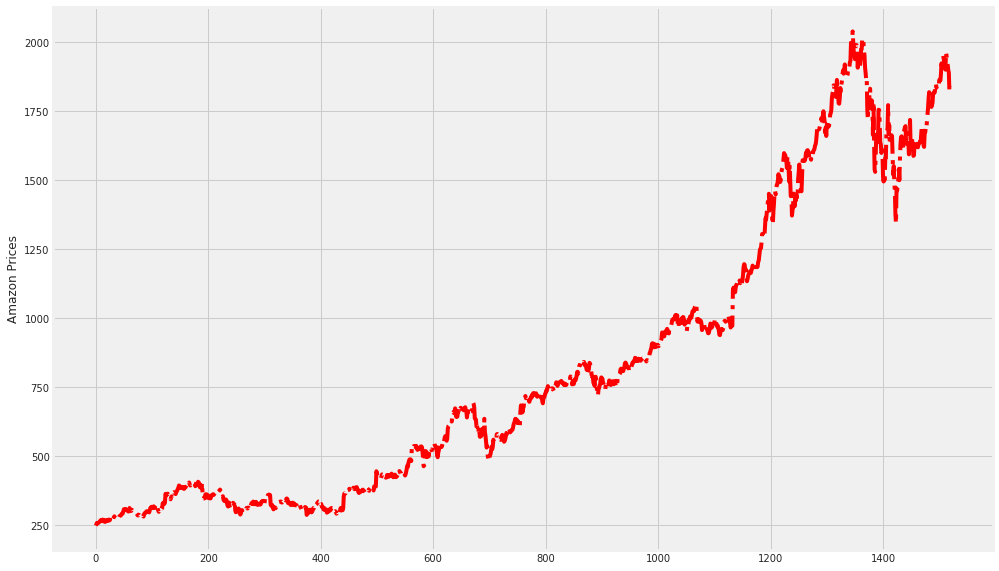

           M-4         M-8
8   260.050003  256.843750
9   261.745003  258.878752
10  264.157502  260.851250
11  265.757500  261.915001
12  265.879998  262.965000
8     264.510010
9     268.329987
10    266.559998
11    264.119995
12    269.899994
Name: AMZN, dtype: float64


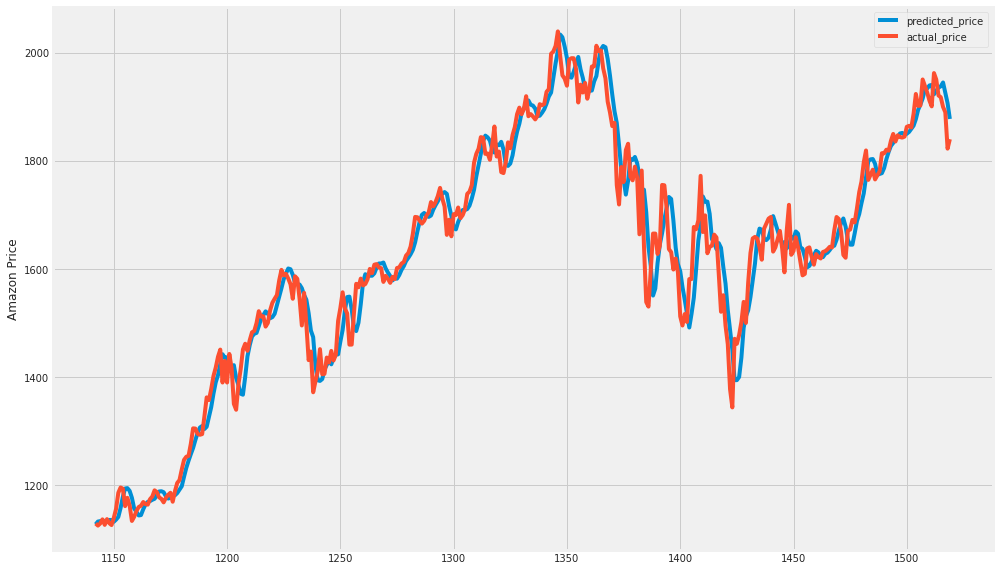

In [30]:
# Amazon

amazon = stocks[['AMZN']] 

# Plot the closing price of the stocks
amazon.AMZN.plot(figsize=(15,10),color='red',linestyle='dashdot')
plt.ylabel("Amazon Prices")
plt.show()

# moving averages, for 4 and 8
amazon['M-4'] = amazon['AMZN'].shift(1).rolling(window=4).mean() 
amazon['M-8']= amazon['AMZN'].shift(1).rolling(window=8).mean() 

amazon= amazon.dropna() # dropping null values

X_amazon = amazon[['M-4','M-8']] 

print(X_amazon.head())

Y_amazon = amazon['AMZN']

print(Y_amazon.head())

t=.75 # used to define the percent of dataset to be taken for train and 1-t for test
t = int(t*len(amazon)) 
# Train dataset 
X_train_amazon = X_amazon[:t] 
y_train_amazon = Y_amazon[:t]  
# Test dataset 
X_test_amazon = X_amazon[t:] 
y_test_amazon = Y_amazon[t:]

# training the model

linear_amazon = LinearRegression().fit(X_train_amazon,y_train_amazon) 

predicted_price_amazon = linear_amazon.predict(X_test_amazon)
predicted_price_amazon = pd.DataFrame(predicted_price_amazon,index=y_test_amazon.index,columns = ['price']) 

# potting actual and predicted values to see how accurately we predicted
predicted_price_amazon.plot(figsize=(15,10)) 
y_test_amazon.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("Amazon Price")  
plt.show()

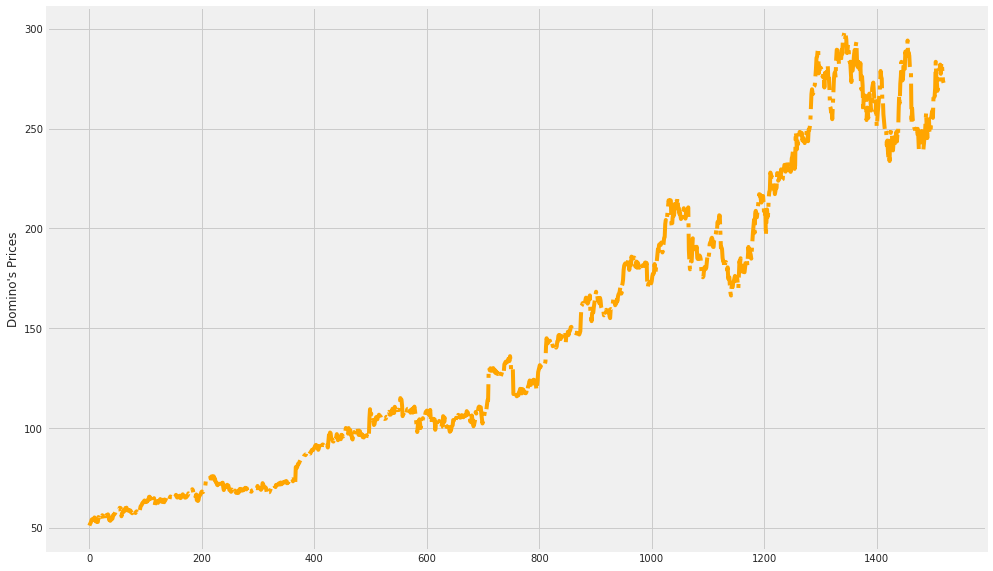

          M-4        M-8
8   54.228798  53.218142
9   54.334196  53.640907
10  54.556703  54.051961
11  54.552020  54.246364
12  54.303748  54.266273
8     54.573097
9     55.275757
10    54.001606
11    53.364532
12    53.936020
Name: DPZ, dtype: float64


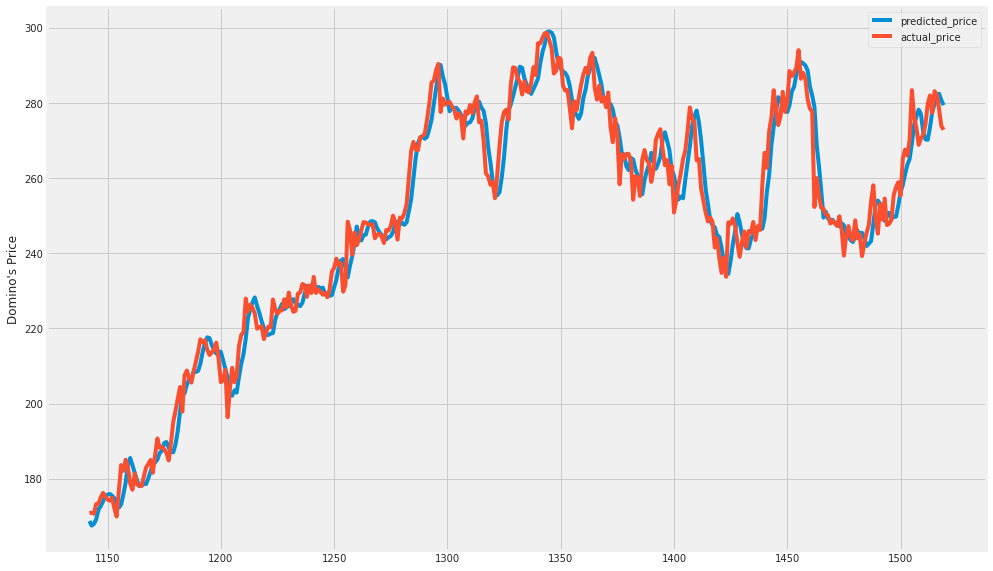

In [4]:
# Domino's

dominos = stocks[['DPZ']] 

dominos.DPZ.plot(figsize=(15,10),color='orange',linestyle='dashdot')
plt.ylabel("Domino's Prices")
plt.show()

dominos['M-4'] = dominos['DPZ'].shift(1).rolling(window=4).mean() 
dominos['M-8']= dominos['DPZ'].shift(1).rolling(window=8).mean() 

dominos= dominos.dropna()

X_dominos = dominos[['M-4','M-8']] 

print(X_dominos.head())

Y_dominos = dominos['DPZ']

print(Y_dominos.head())

t=.75
t = int(t*len(dominos)) 
# Train dataset 
X_train_dominos = X_dominos[:t] 
y_train_dominos = Y_dominos[:t]  
# Test dataset 
X_test_dominos = X_dominos[t:] 
y_test_dominos = Y_dominos[t:]

linear_dominos = LinearRegression().fit(X_train_dominos,y_train_dominos)

predicted_price_dominos = linear_dominos.predict(X_test_dominos)

predicted_price_dominos = pd.DataFrame(predicted_price_dominos,index=y_test_dominos.index,columns = ['price']) 
predicted_price_dominos.plot(figsize=(15,10)) 
y_test_dominos.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("Domino's Price") 
plt.show()



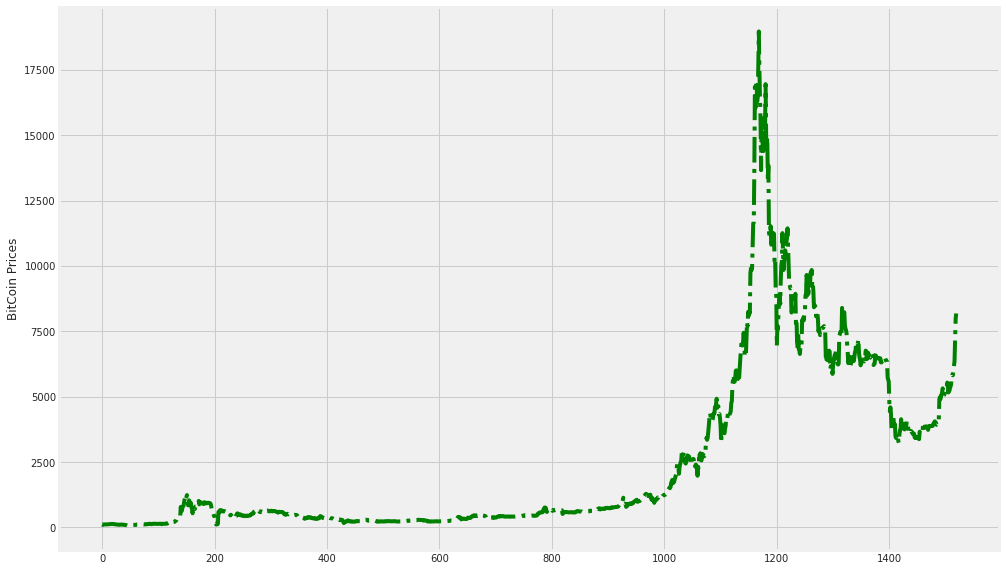

           M-4         M-8
8   114.834999  110.773749
9   114.385000  111.417500
10  114.740000  113.432500
11  114.867500  114.096249
12  116.832500  115.833750
8     111.400002
9     114.220001
10    118.209999
11    123.500000
12    123.209999
Name: BTC, dtype: float64


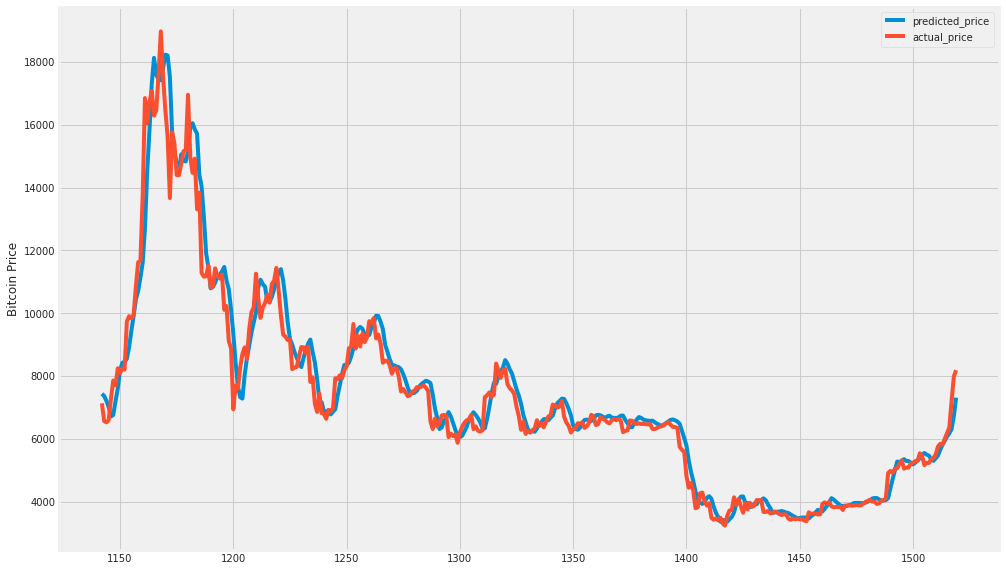

In [5]:
#Bitcoin

bitcoin = stocks[['BTC']]

bitcoin.BTC.plot(figsize=(15,10),color='green',linestyle='dashdot')
plt.ylabel("BitCoin Prices")
plt.show()

bitcoin['M-4'] = bitcoin['BTC'].shift(1).rolling(window=4).mean() 
bitcoin['M-8']= bitcoin['BTC'].shift(1).rolling(window=8).mean() 

bitcoin= bitcoin.dropna()

X_bitcoin = bitcoin[['M-4','M-8']] 

print(X_bitcoin.head())

Y_bitcoin = bitcoin['BTC']

print(Y_bitcoin.head())

t=.75
t = int(t*len(bitcoin)) 
# Train dataset 
X_train_bitcoin = X_bitcoin[:t] 
y_train_bitcoin = Y_bitcoin[:t]  
# Test dataset 
X_test_bitcoin = X_bitcoin[t:] 
y_test_bitcoin = Y_bitcoin[t:]


linear_bitcoin = LinearRegression().fit(X_train_bitcoin,y_train_bitcoin)

predicted_price_bitcoin = linear_bitcoin.predict(X_test_bitcoin)  

predicted_price_bitcoin = pd.DataFrame(predicted_price_bitcoin,index=y_test_bitcoin.index,columns = ['price']) 
predicted_price_bitcoin.plot(figsize=(15,10)) 
y_test_bitcoin.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("Bitcoin Price") 
plt.show()



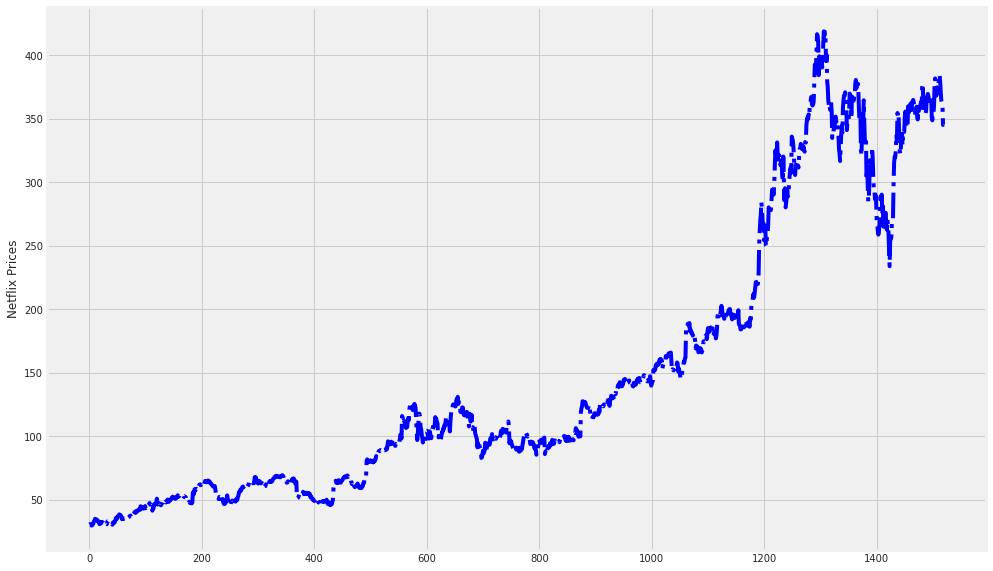

          M-4        M-8
8   30.320000  30.366071
9   31.146071  30.660178
10  32.051786  31.008036
11  33.015714  31.542857
12  33.706428  32.013214
8     32.768570
9     33.424286
10    34.771427
11    33.861427
12    34.142857
Name: NFLX, dtype: float64


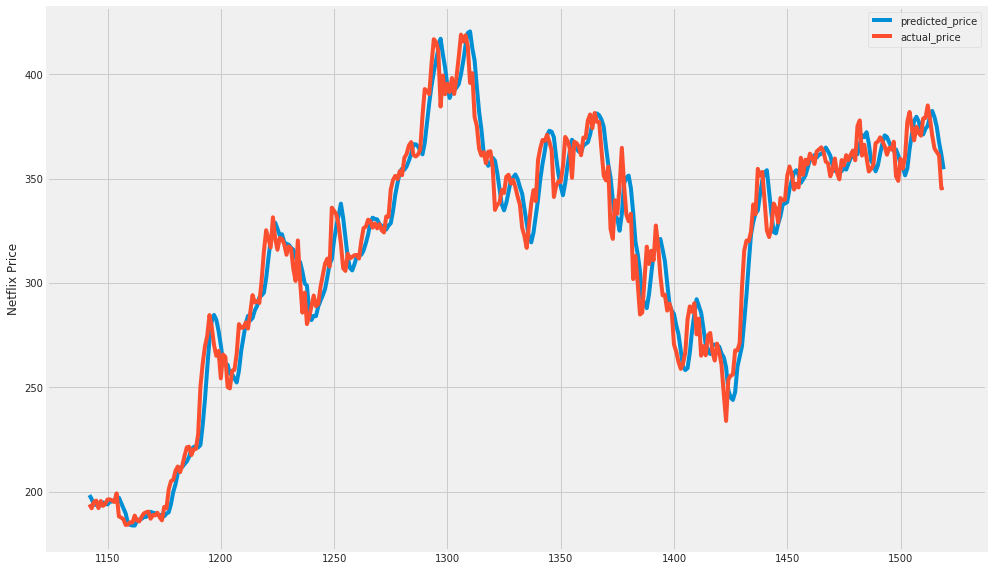

In [6]:
#Netflix

netflix = stocks[['NFLX']]

netflix.NFLX.plot(figsize=(15,10),color='blue',linestyle='dashdot') 
plt.ylabel("Netflix Prices")
plt.show()

netflix['M-4'] = netflix['NFLX'].shift(1).rolling(window=4).mean() 
netflix['M-8']= netflix['NFLX'].shift(1).rolling(window=8).mean() 

netflix= netflix.dropna()

X_netflix = netflix[['M-4','M-8']] 

print(X_netflix.head())

Y_netflix = netflix['NFLX']

print(Y_netflix.head())

t=.75
t = int(t*len(netflix)) 
# Train dataset 
X_train_netflix = X_netflix[:t] 
y_train_netflix = Y_netflix[:t]  
# Test dataset 
X_test_netflix = X_netflix[t:] 
y_test_netflix = Y_netflix[t:]

linear_netflix = LinearRegression().fit(X_train_netflix,y_train_netflix)

predicted_price_netflix = linear_netflix.predict(X_test_netflix)


predicted_price_netflix = pd.DataFrame(predicted_price_netflix,index=y_test_netflix.index,columns = ['price']) 
predicted_price_netflix.plot(figsize=(15,10)) 
y_test_netflix.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("Netflix Price") 
plt.show()


### Question 2 (25 points) The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset. The dataset can be downloaded here: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/Twitter%20Sentiment%20Analysis. Please build a logistic regression model for the classification, evaluation metrics include accuracy, precision, recall, and F-1 score need to be reported. 

**Reference**:

https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/#h2_5

In [7]:
### You code here:

!unzip /content/test.csv.zip
!unzip /content/train.csv.zip

Archive:  /content/test.csv.zip
  inflating: test.csv                
Archive:  /content/train.csv.zip
  inflating: train.csv               


In [8]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
from wordcloud import WordCloud
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [9]:
train  = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [10]:
train.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [11]:
full = train.append(test, ignore_index=True) # combining train and test to clean the tweets

In [12]:
def remove_pattern(input, pattern):  # defining a function to remove a specific kind of pattern 
    r = re.findall(pattern, input) 
    for i in r:
        input = re.sub(i, '', input)
        
    return input

In [13]:
# we are removing the '@user', as a privacy concern and they dont have any information about the nature of tweet
full['clean_tweet'] = np.vectorize(remove_pattern)(full['tweet'], "@[\w]*")

In [14]:
# removing special characters, numbers, punctuations to make task easy. Replacing everything except characters and hashtags with spaces.
full['clean_tweet'] = full['clean_tweet'].str.replace("[^a-zA-Z#]", " ")


In [15]:
# removing small words as they do not add value 
full['clean_tweet'] = full['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [16]:
full.head(10) # having a look at the cleaned tweets.

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


In [17]:
#splitting in to words 
words = full['clean_tweet'].apply(lambda x: x.split())
words.head(10)

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
5    [huge, fare, talking, before, they, leave, cha...
6                           [camping, tomorrow, danny]
7    [next, school, year, year, exams, think, about...
8    [love, land, #allin, #cavs, #champions, #cleve...
9                                      [welcome, here]
Name: clean_tweet, dtype: object

In [18]:
# stemming the words to reduce unique words at the same time not reducing significant information
from nltk.stem.porter import *
stemmer = PorterStemmer()

words = words.apply(lambda x: [stemmer.stem(i) for i in x]) 
words.head(10)


0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
5    [huge, fare, talk, befor, they, leav, chao, di...
6                              [camp, tomorrow, danni]
7    [next, school, year, year, exam, think, about,...
8    [love, land, #allin, #cav, #champion, #clevela...
9                                       [welcom, here]
Name: clean_tweet, dtype: object

In [19]:
# reframming our tweets, fully cleaned
for i in range(len(words)):
    words[i] = ' '.join(words[i])

full['clean_tweet'] = words
full.head(10)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talk befor they leav chao disput whe...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camp tomorrow danni
7,8,0.0,the next school year is the year for exams.ð...,next school year year exam think about that #s...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cav #champion #cleveland #cl...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcom here


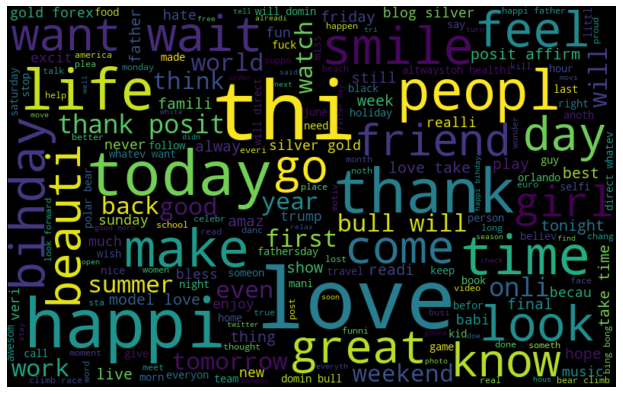

In [20]:
#  plotting all the words using word cloud to know which words are used the most
all_words = ' '.join([text for text in full['clean_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

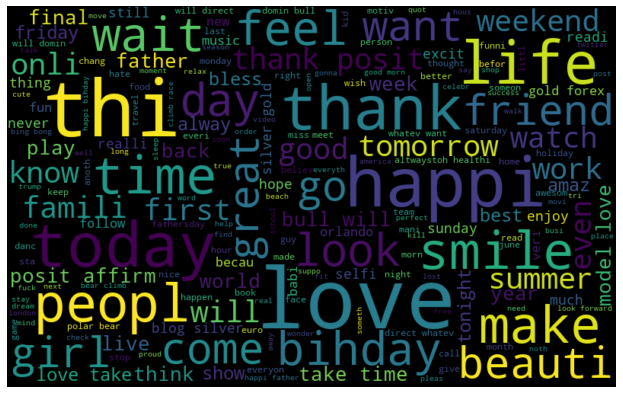

In [21]:

nonracistwords =' '.join([text for text in full['clean_tweet'][full['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(nonracistwords)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

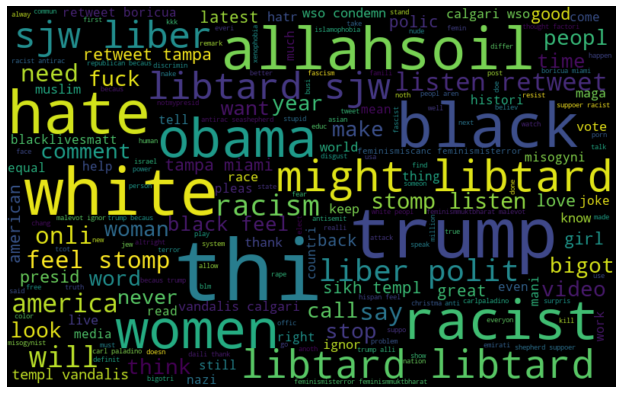

In [22]:
racistwords = ' '.join([text for text in full['clean_tweet'][full['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(racistwords)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [23]:
# function to collect hashtags
def hasgtag(x):
    hash = []
    # Loop over the words in the tweet
    for i in x:
        y = re.findall(r"#(\w+)", i)
        hash.append(y)

    return hash

In [24]:
# storing non racist hashtags 
hash_nonraci = hasgtag(full['clean_tweet'][full['label'] == 0])

# storing non racist hashtags
hash_raci = hasgtag(full['clean_tweet'][full['label'] == 1])

# unnesting list
hash_nonraci = sum(hash_nonraci,[])
hash_raci = sum(hash_raci,[])


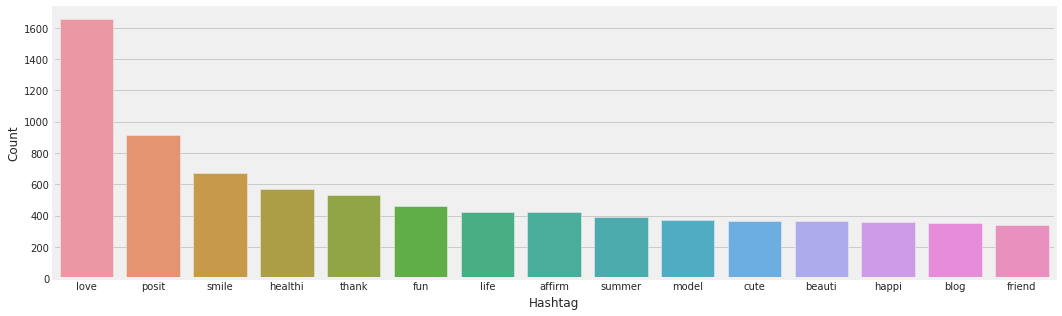

In [25]:
# visualising the count of top 15 non racist hashtags 
a = nltk.FreqDist(hash_nonraci) # gets the frequency of each hashtag
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})  # creating a dataframe with columns hashtag and count    
d = d.nlargest(columns="Count", n = 15) # taking only top 15 tags
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


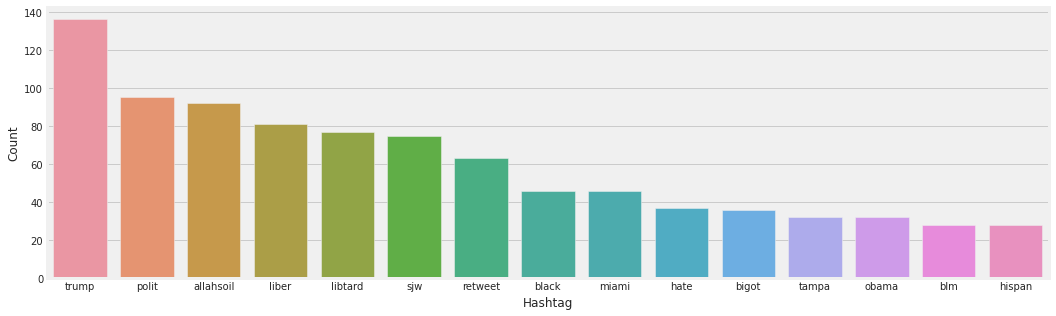

In [26]:
# similarly for racist hashtags
b = nltk.FreqDist(hash_raci)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
e = e.nlargest(columns="Count", n = 15)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [27]:
# Using TF-IDF to construct the text features

from sklearn.feature_extraction.text import TfidfVectorizer 

TFIDF_vec = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
TFIDF = TFIDF_vec.fit_transform(full['clean_tweet'])

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# splitting the data in to train and test
ytrain, yvalid = train_test_split(train['label'], random_state=42, test_size=0.3)

In [29]:
# dividing data to train and test
train_tfidf = TFIDF[:31962,:] 
test_tfidf = TFIDF[31962:,:]

# assigning index parameters
xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg = LogisticRegression() # regression model
lreg.fit(xtrain_tfidf, ytrain) # training

pred = lreg.predict_proba(xvalid_tfidf) # predicting on the validation set
pred_int = pred[:,1] >= 0.3
pred_int = pred_int.astype(np.int)

print('F1_score : ',f1_score(yvalid, pred_int)) # f1 score of predicted set
print('Report of other values')
print(classification_report(yvalid, pred_int)) # report

F1_score :  0.5451327433628319
Report of other values
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8905
           1       0.69      0.45      0.55       684

    accuracy                           0.95      9589
   macro avg       0.82      0.72      0.76      9589
weighted avg       0.94      0.95      0.94      9589

